In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
df = pd.read_csv(f"C:\\data science\\Prodegy inetrnship\\bank+marketing\\bank\\bank-full.csv",sep=None,engine='python')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [62]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [63]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Histogram

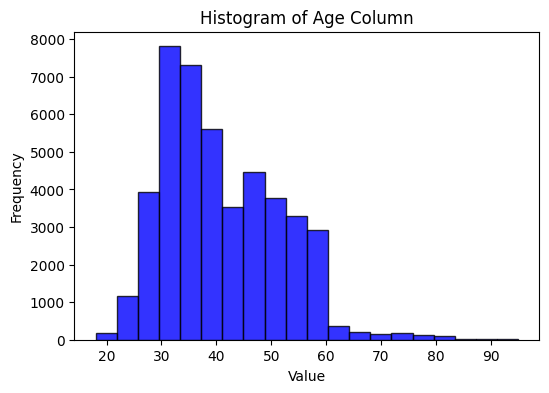

In [64]:
plt.figure(figsize=(6,4))
plt.hist(df['age'],color="blue",bins=20,edgecolor="black",alpha=0.8)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Age Column")
plt.show()

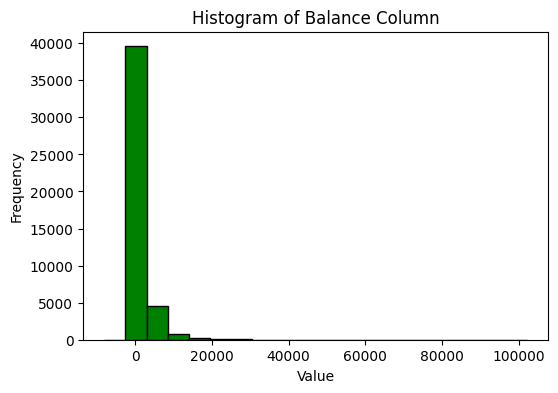

In [65]:
plt.figure(figsize=(6,4))
plt.hist(df['balance'],color="green",bins=20,edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Balance Column")
plt.show()

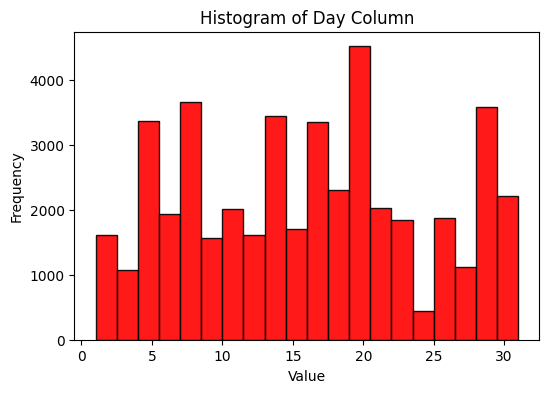

In [66]:
plt.figure(figsize=(6,4))
plt.hist(df['day'],color="red",bins=20,edgecolor="black",alpha=0.9)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Day Column")
plt.show()

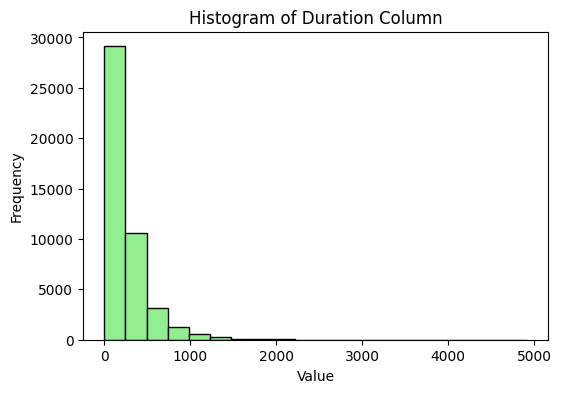

In [67]:
plt.figure(figsize=(6,4))
plt.hist(df['duration'],color="lightgreen",bins=20,edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Duration Column")
plt.show()

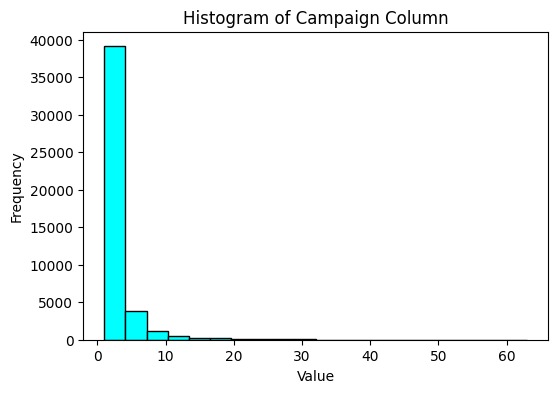

In [68]:
plt.figure(figsize=(6,4))
plt.hist(df['campaign'],color="cyan",bins=20,edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Campaign Column")
plt.show()

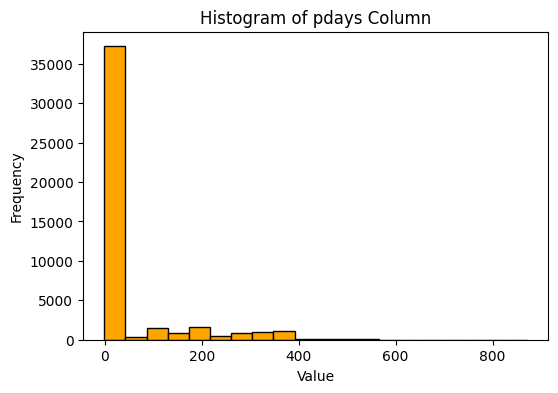

In [69]:
plt.figure(figsize=(6,4))
plt.hist(df['pdays'],color="orange",bins=20,edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of pdays Column")
plt.show()

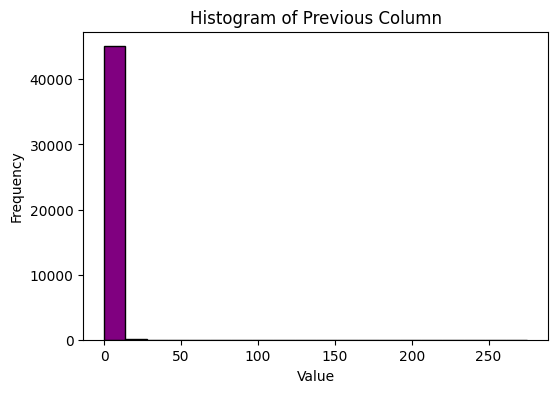

In [70]:
plt.figure(figsize=(6,4))
plt.hist(df['previous'],color="purple",bins=20,edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Previous Column")
plt.show()

## Box Plot

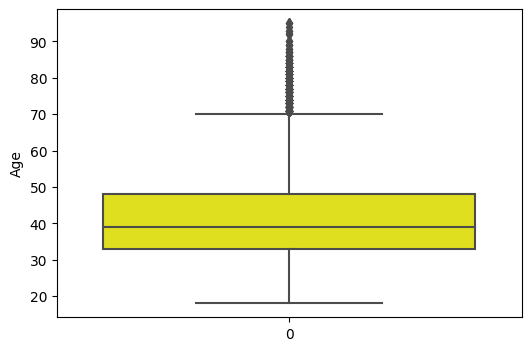

In [71]:
plt.figure(figsize=(6,4))
sns.boxplot(df['age'],color='yellow')
plt.ylabel("Age")
plt.show()

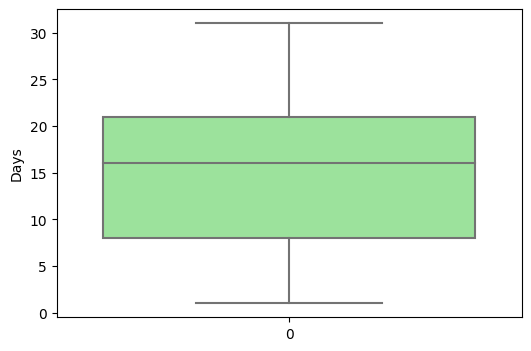

In [72]:
plt.figure(figsize=(6,4))
sns.boxplot(df['day'],color='lightgreen')
plt.ylabel("Days")
plt.show()

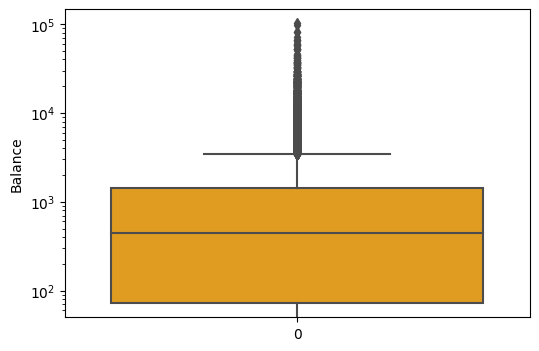

In [73]:
plt.figure(figsize=(6,4))
sns.boxplot(df['balance'],color='orange')
plt.yscale("log")
plt.ylabel("Balance")
plt.show()

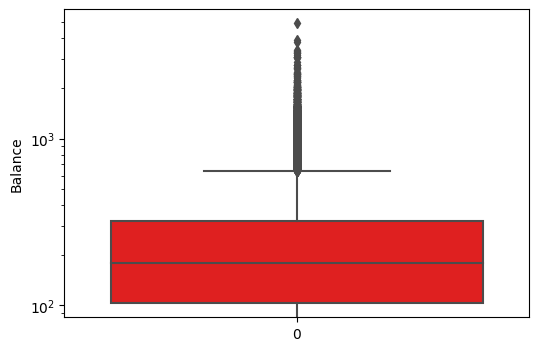

In [74]:
plt.figure(figsize=(6,4))
sns.boxplot(df['duration'],color='red')
plt.yscale("log")
plt.ylabel("Balance")
plt.show()

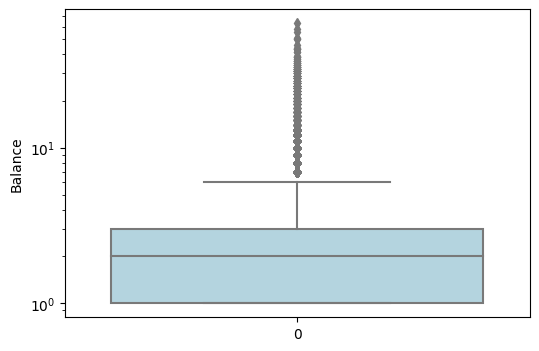

In [75]:
plt.figure(figsize=(6,4))
sns.boxplot(df['campaign'],color='lightblue')
plt.yscale("log")
plt.ylabel("Balance")
plt.show()

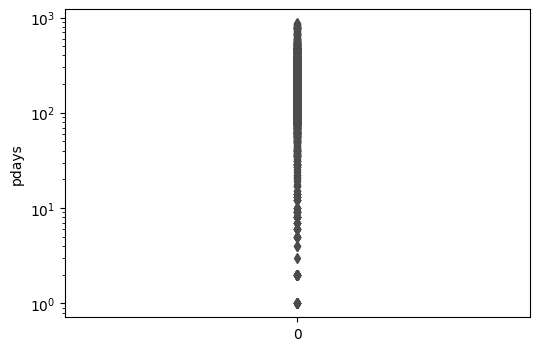

In [76]:
plt.figure(figsize=(6,4))
sns.boxplot(df['pdays'],color='yellow')
plt.yscale("log")
plt.ylabel("pdays")
plt.show()

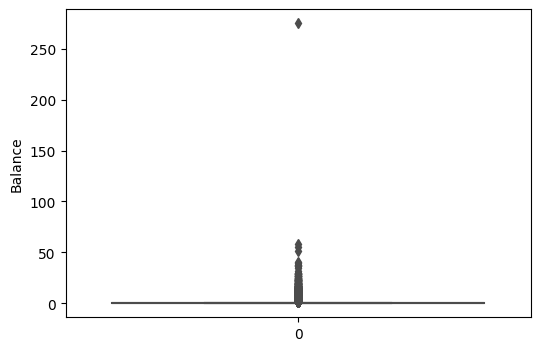

In [77]:
plt.figure(figsize=(6,4))
sns.boxplot(df["previous"],color='yellow')
#plt.yscale("log")
plt.ylabel("Balance")
plt.show()

## Bar Plot 

In [78]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

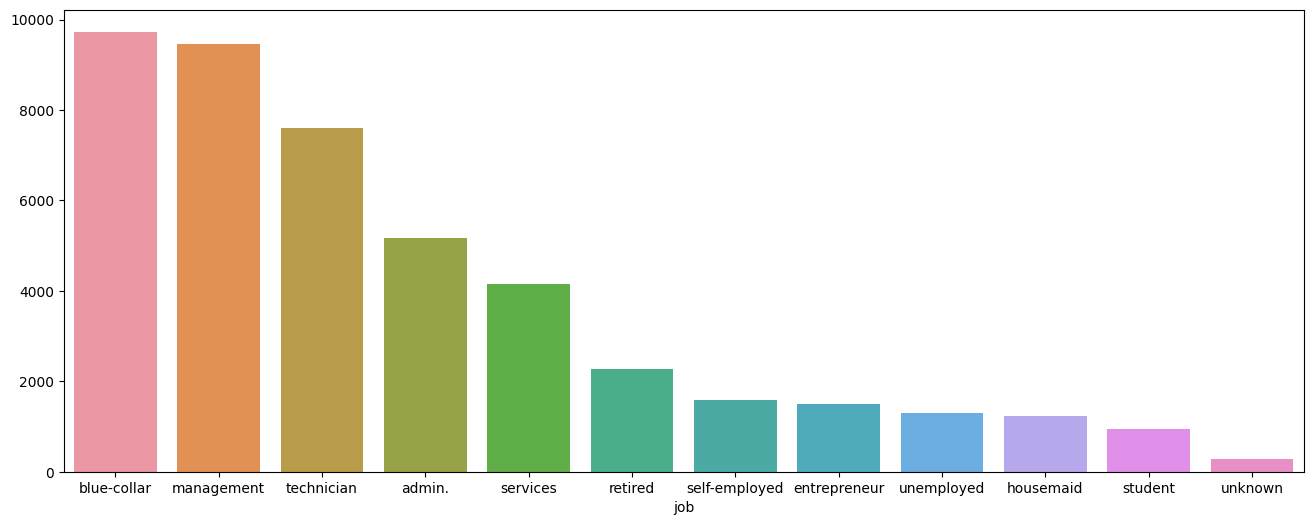

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


In [79]:
job_count= df['job'].value_counts()
plt.figure(figsize=(16,6))
sns.barplot(x=job_count.index, y=job_count.values)
plt.show()
print(job_count)

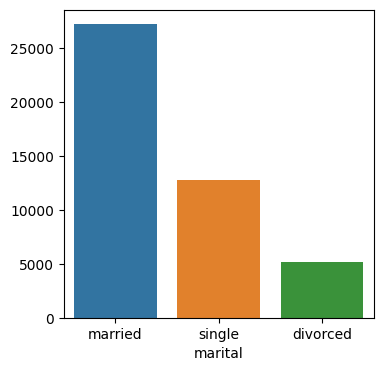

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


In [80]:
martial_count= df['marital'].value_counts()

plt.figure(figsize=(4,4))
sns.barplot(x=martial_count.index, y=martial_count.values)
plt.show()
print(martial_count)

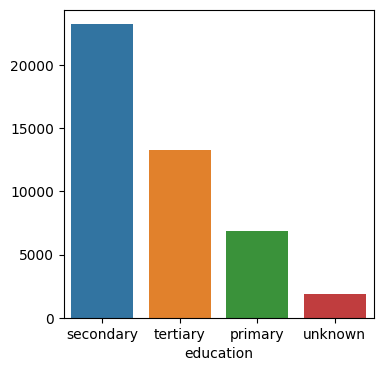

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [81]:
edu_count= df['education'].value_counts()

plt.figure(figsize=(4,4))
sns.barplot(x=edu_count.index, y=edu_count.values)
plt.show()
print(edu_count)

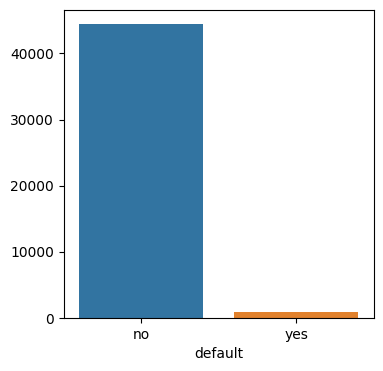

default
no     44396
yes      815
Name: count, dtype: int64


In [82]:
default_count= df['default'].value_counts()

plt.figure(figsize=(4,4))
sns.barplot(x=default_count.index, y=default_count.values)
plt.show()
print(default_count)

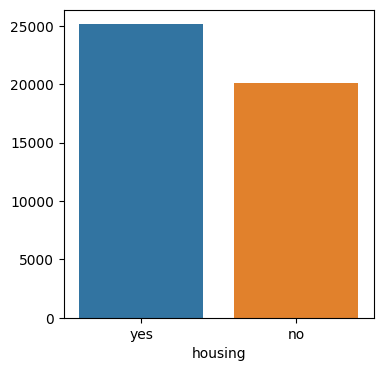

housing
yes    25130
no     20081
Name: count, dtype: int64


In [83]:
housing_count= df['housing'].value_counts()

plt.figure(figsize=(4,4))
sns.barplot(x=housing_count.index, y=housing_count.values)
plt.show()
print(housing_count)

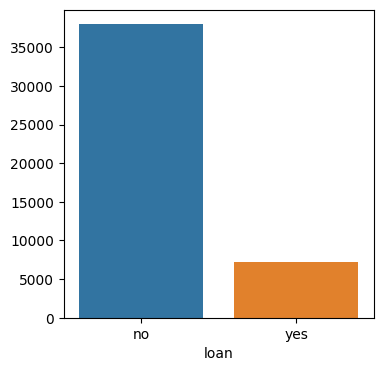

loan
no     37967
yes     7244
Name: count, dtype: int64


In [84]:
loan_count= df['loan'].value_counts()

plt.figure(figsize=(4,4))
sns.barplot(x=loan_count.index, y=loan_count.values)
plt.show()
print(loan_count)

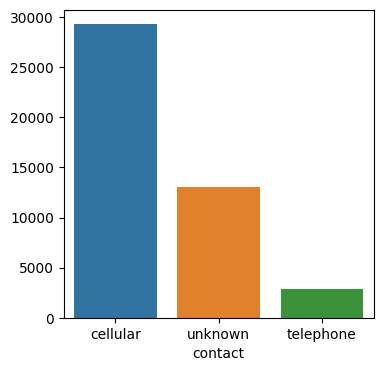

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


In [85]:
contact_count= df['contact'].value_counts()

plt.figure(figsize=(4,4))
sns.barplot(x=contact_count.index, y=contact_count.values)
plt.show()
print(contact_count)

In [86]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

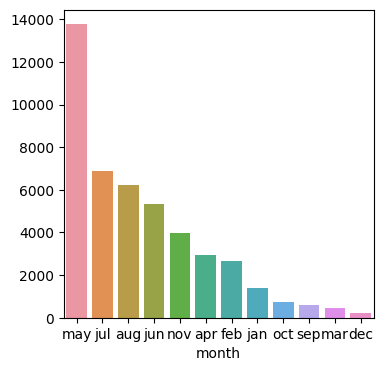

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


In [87]:
month_count= df['month'].value_counts()

plt.figure(figsize=(4,4))
sns.barplot(x=month_count.index, y=month_count.values)
plt.show()
print(month_count)

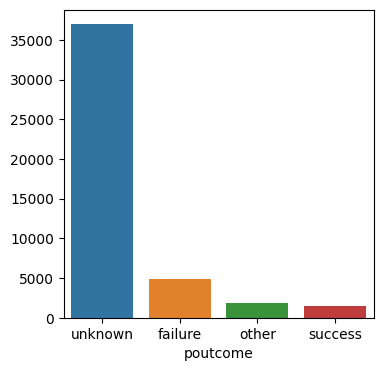

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


In [88]:
poutcome_count= df['poutcome'].value_counts()

plt.figure(figsize=(4,4))
sns.barplot(x=poutcome_count.index, y=poutcome_count.values)
plt.show()
print(poutcome_count)

<Figure size 1200x600 with 0 Axes>

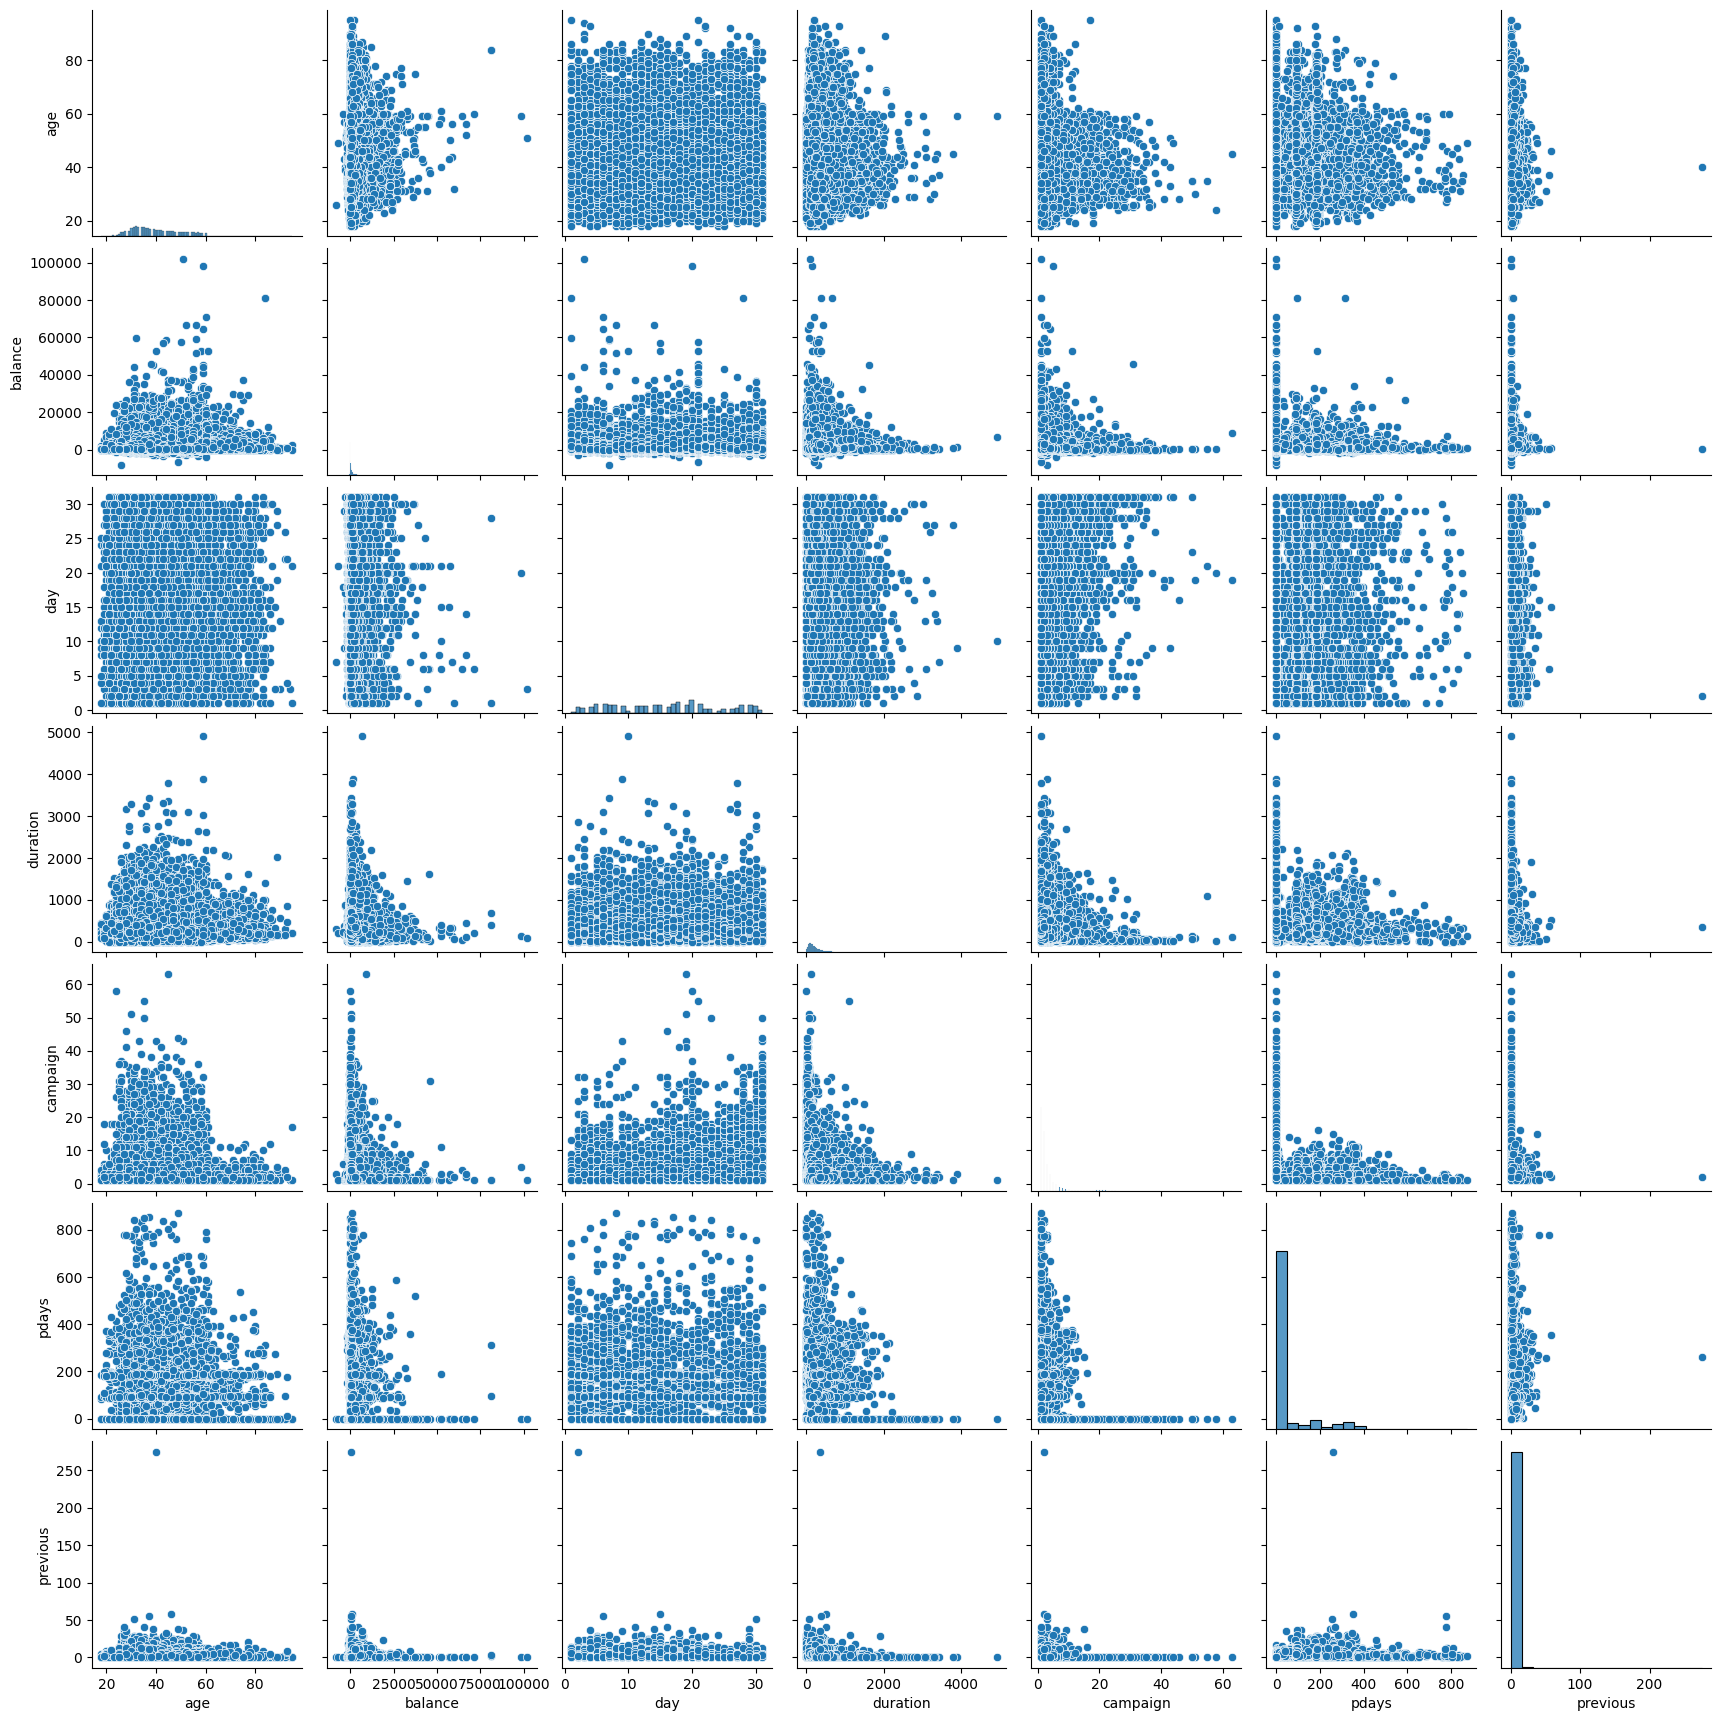

In [89]:
import sys
import warnings

# Redirect warnings to a file
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Redirect stderr to null file
plt.figure(figsize=(12, 6))
sns.pairplot(data=df, palette='colorblind', diag_kind='hist')
plt.show()


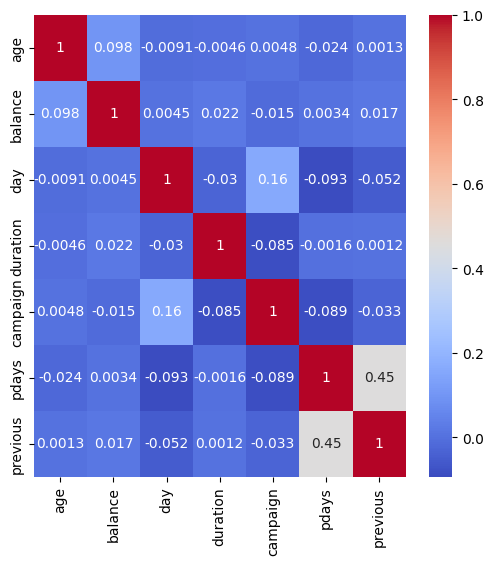

In [32]:
numeric_df = df.select_dtypes(include=['int', 'float'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)
plt.show()

In [33]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [34]:
label_encoder = LabelEncoder()
df['job'] = label_encoder.fit_transform(df['job'])
print(df['job'][:5])

0     4
1     9
2     2
3     1
4    11
Name: job, dtype: int32


In [35]:
df['marital'] = label_encoder.fit_transform(df['marital'])
print(df['marital'][:5])

0    1
1    2
2    1
3    1
4    2
Name: marital, dtype: int32


In [36]:
df['education'] = label_encoder.fit_transform(df['education'])
print(df['education'][:5])

0    2
1    1
2    1
3    3
4    3
Name: education, dtype: int32


In [37]:
df['default'] = label_encoder.fit_transform(df['default'])
print(df['default'][:5])

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int32


In [38]:
df['housing'] = label_encoder.fit_transform(df['housing'])
print(df['housing'][:5])

0    1
1    1
2    1
3    1
4    0
Name: housing, dtype: int32


In [39]:
df['loan'] = label_encoder.fit_transform(df['loan'])
print(df['loan'][:5])

0    0
1    0
2    1
3    0
4    0
Name: loan, dtype: int32


In [40]:
df['contact']= label_encoder.fit_transform(df['contact'])
print(df['contact'][:5])

0    2
1    2
2    2
3    2
4    2
Name: contact, dtype: int32


In [41]:
df['month'] = label_encoder.fit_transform(df['month'])
print(df['month'][:5])

0    8
1    8
2    8
3    8
4    8
Name: month, dtype: int32


In [42]:
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
print(df['poutcome'][:5])

0    3
1    3
2    3
3    3
4    3
Name: poutcome, dtype: int32


In [43]:
df['y'] = label_encoder.fit_transform(df['y'])
print(df['y'][:5])

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32


In [44]:
x = df.drop('y',axis=1)
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [45]:
y = df['y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [46]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(" x train :",x_train.shape)
print(" x test :",x_test.shape)
print(" y train :",y_train.shape)
print(" y test :",y_test.shape)

 x train : (36168, 16)
 x test : (9043, 16)
 y train : (36168,)
 y test : (9043,)


In [47]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini',max_depth=10,max_leaf_nodes=10,min_samples_split=15)
clf_gini.fit(x_train,y_train)
clf_pred = clf_gini.predict(x_test)
print([clf_pred[:30]])

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0])]


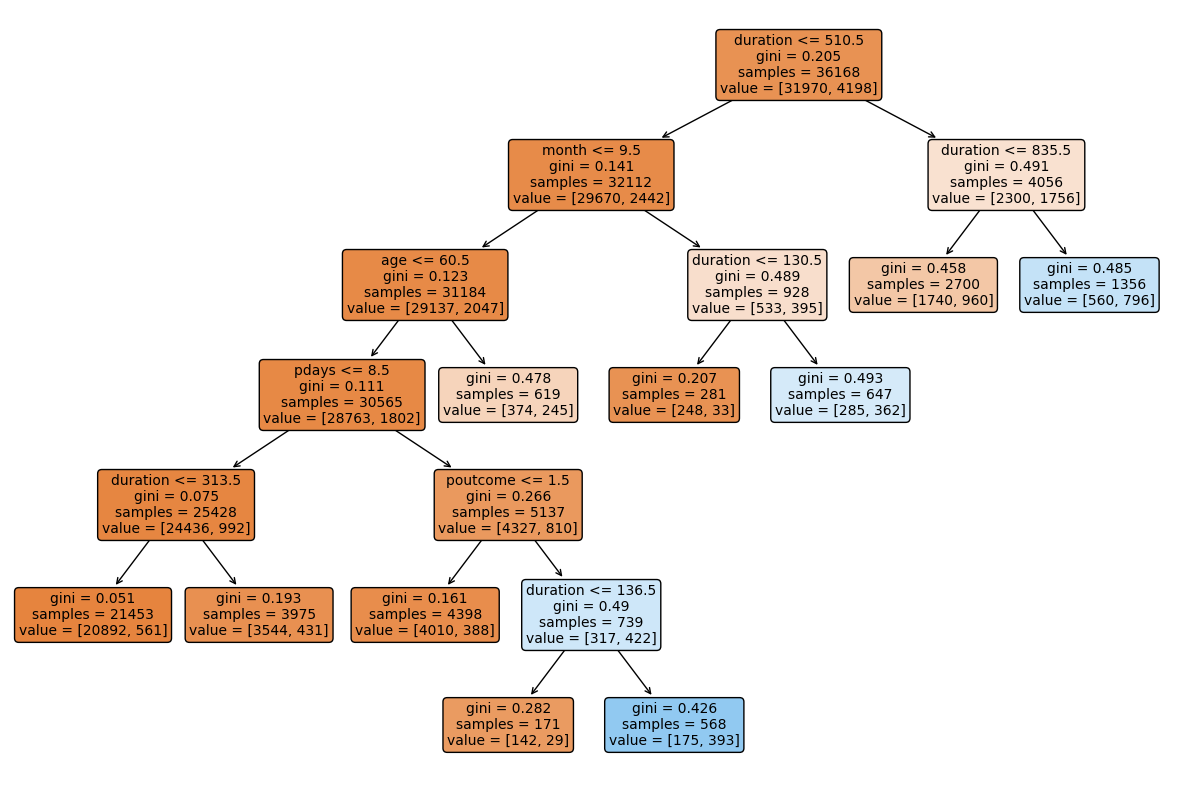

In [48]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini, feature_names=list(x.columns), filled=True, rounded= True)
plt.show()

In [49]:
results = pd.DataFrame({'Actual': y_test,'Predicted': clf_pred})
results.head(15)

,Actual,Predicted
3776,0,0
9928,0,0
33409,0,0
31885,0,0
15738,0,0
30813,0,0
35463,0,0
31382,0,0
16904,0,0
11930,0,0


In [50]:
print("The accuracy score is: ",accuracy_score(y_test,clf_pred))

The accuracy score is:  0.892734711931881


In [51]:
print("confusion Matrix: \n", confusion_matrix(y_test,clf_pred))

confusion Matrix: 
 [[7676  276]
 [ 694  397]]


In [52]:
print("Classification Report: \n", classification_report(y_test,clf_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.59      0.36      0.45      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.66      0.70      9043
weighted avg       0.88      0.89      0.88      9043



In [53]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
rf_pred = rf.predict(x_test)
print([rf_pred[:30]])

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0])]


In [55]:
print("accurace score: ",accuracy_score(y_test,rf_pred))

accurace score:  0.9018024991706293


In [56]:
print("Confusion Matrix: \n",confusion_matrix(y_test,rf_pred))

Confusion Matrix: 
 [[7693  259]
 [ 629  462]]


In [57]:
print("classification report: \n", classification_report(y_test,rf_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.64      0.42      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.70      0.73      9043
weighted avg       0.89      0.90      0.89      9043

